In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# Loading The Dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train) , (X_test, y_test ) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5


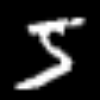

In [5]:
print(y_train[0])
cv2_imshow(cv2.resize(X_train[0], (100,100)))

# Visualizing The Images

In [6]:
np.random.randint(0,59999)

41265

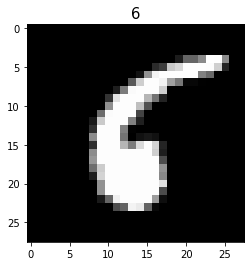

In [7]:
i = np.random.randint(0,59999)
plt.title(y_train[i], fontsize = 15)
plt.imshow(X_train[i], cmap = "gray")
plt.show()

In [8]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

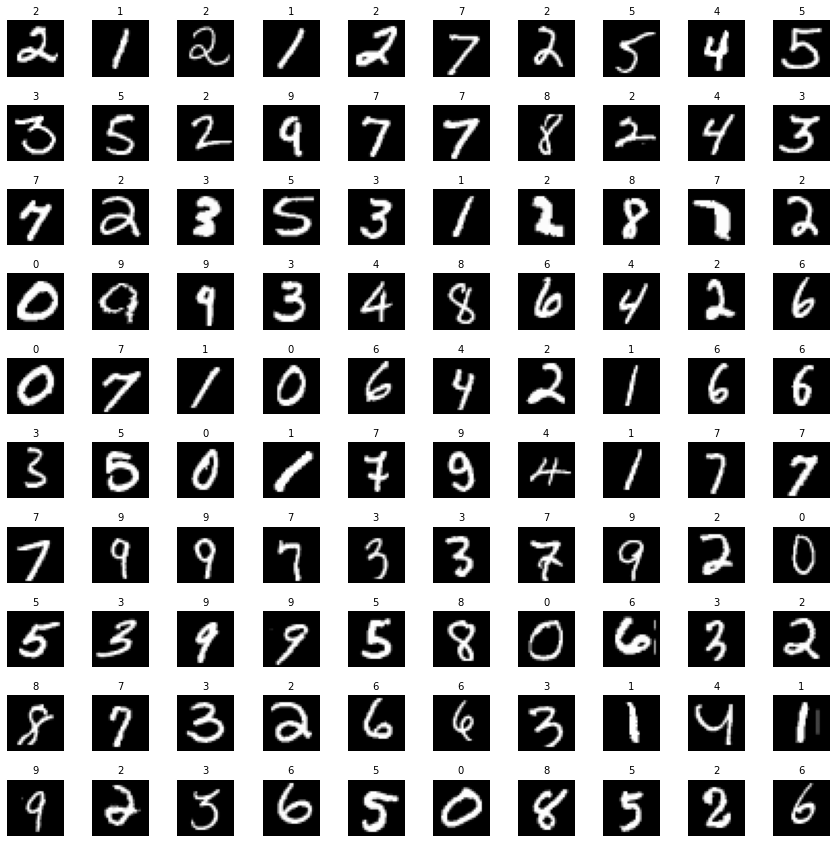

In [9]:
width = 10
height = 10

fig , axes = plt.subplots(nrows = height, ncols = width , figsize = (15,15))
#print(axes.shape)
# Buradaki amaç normalde axes[0,1] yada axes[2,3] gibi erişmek yerine direk olarak (10,10) -- > 100 Çeviriyor..

axes = axes.ravel()
#print(axes.shape)

for i in np.arange(0, width * height ):
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.5)

# Pre-Processing The Images

In [10]:
X_train.max(), X_train.min(),X_test.max(),X_test.min()

(255, 0, 255, 0)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

X_train.max(), X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [12]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] * X_test.shape[2])

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# Building And Traning The Linear AutoEncoder

In [13]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Input

In [14]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation = "relu", input_dim = 784))
autoencoder.add(Dense(units = 64, activation = "relu"))
autoencoder.add(Dense(units = 32, activation = "relu"))

# Decode
autoencoder.add(Dense(units = 64, activation = "relu"))
autoencoder.add(Dense(units = 128, activation = "relu"))
autoencoder.add(Dense(units = 784, activation = "sigmoid"))

autoencoder.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = 50, validation_data = (X_test, X_test))

In [27]:
def history_graph(history, epochs):

    plt.figure(figsize = (10,6))

    plt.subplot(121)
    plt.plot(history.history["accuracy"],label = "Train")
    plt.plot(history.history["val_accuracy"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Accuracy Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.subplot(122)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Loss Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.tight_layout()
    plt.show()

def confusion_graph(y_test,y_pred):

    cm = confusion_matrix(y_test,y_pred)

    plt.figure(figsize = (10,5))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, linewidth = 0.4, linecolor="white", annot_kws = {"size" : 20})
    plt.ylabel("Actual",fontsize = 15)
    plt.xlabel("Predicted",fontsize = 15)
    plt.title("Confusion Matrix Graph", fontsize = 15)
    plt.show()

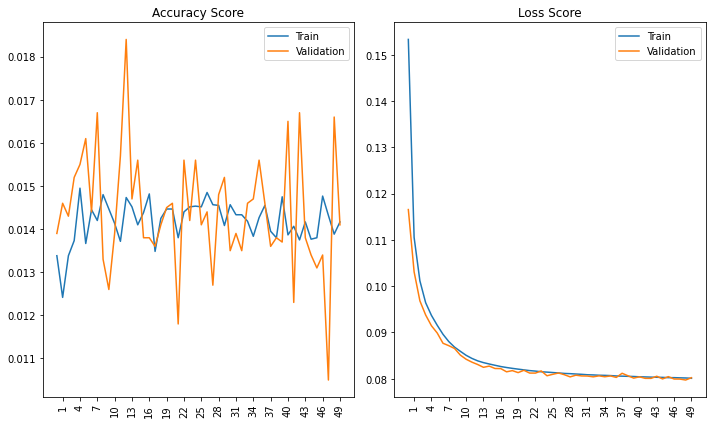

In [19]:
history_graph(history, epochs = 50)

# Encoding The Images

In [45]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [46]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [47]:
autoencoder.get_layer("dense_2").output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [48]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer("dense_2").output)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [49]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

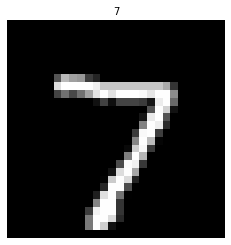

In [57]:
i = np.random.randint(0,59999)
i = 0
plt.imshow(X_test[i].reshape(28,28), cmap = "gray")
plt.title(y_test[i], fontsize = 10)
plt.axis("off")
plt.show()

In [58]:
encoded_image = encoder.predict(X_test[i].reshape(1,-1))
encoded_image.shape,encoded_image

((1, 32),
 array([[3.5558202, 3.412556 , 4.6388435, 2.9805753, 0.       , 4.649837 ,
         2.7759125, 6.3763647, 5.378161 , 1.4318466, 2.510841 , 0.       ,
         6.401682 , 3.2628477, 6.4449434, 5.2232995, 1.3134667, 0.       ,
         3.983909 , 5.286829 , 2.8110995, 7.6485868, 3.337944 , 6.4479904,
         5.3064203, 4.7435155, 7.4438305, 4.845845 , 2.2308586, 0.       ,
         5.7694745, 7.680992 ]], dtype=float32))

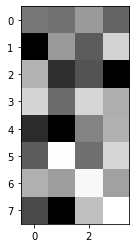

In [59]:
plt.imshow(encoded_image.reshape(8,4), cmap = "gray")
plt.show()

# Decoding The Images

In [60]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [61]:
input_layer_decoder = Input(shape = (32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))) ) 
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [62]:
decoded_image = decoder.predict(encoded_image)
decoded_image.shape

(1, 784)

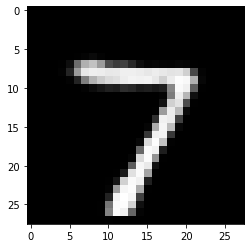

In [63]:
plt.imshow(decoded_image.reshape(28,28), cmap = "gray")
plt.show()

# Encoding and Decoding The Test Images

In [64]:
X_test.shape[0]

10000

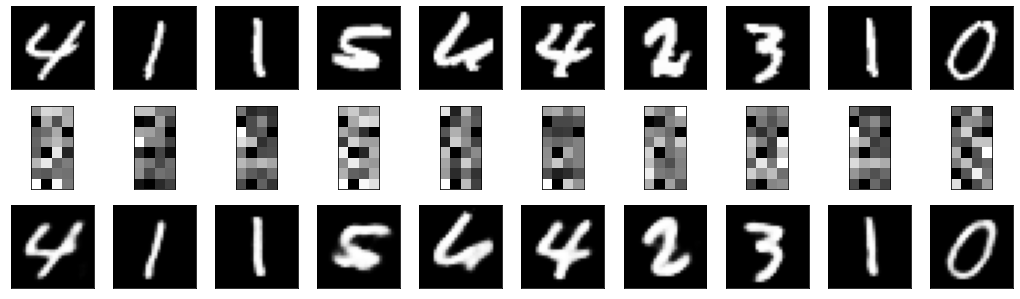

In [67]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0]-1, size = n_images) # 10 tane değer döner !!!!
#print(test_images)
plt.figure(figsize = (18,18))
for i,image_index in enumerate(test_images):

    # Original Image 

    ax = plt.subplot(10,10, i + 1) # 0 kabul etmiyor !!! ondan + 1
    plt.imshow(X_test[image_index].reshape(28, 28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

    # Encoded Images

    ax = plt.subplot(10,10, i + 1 + n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4), cmap = "gray") 
    plt.xticks(())
    plt.yticks(())

    # Decoded Images

    ax = plt.subplot(10,10, i + 1 + 2*n_images)
    plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())


# Convolutional AutoEncoders

# Importing The Libraries

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, UpSampling2D, Reshape , Flatten, Input

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train,y_train) , (X_test, y_test ) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

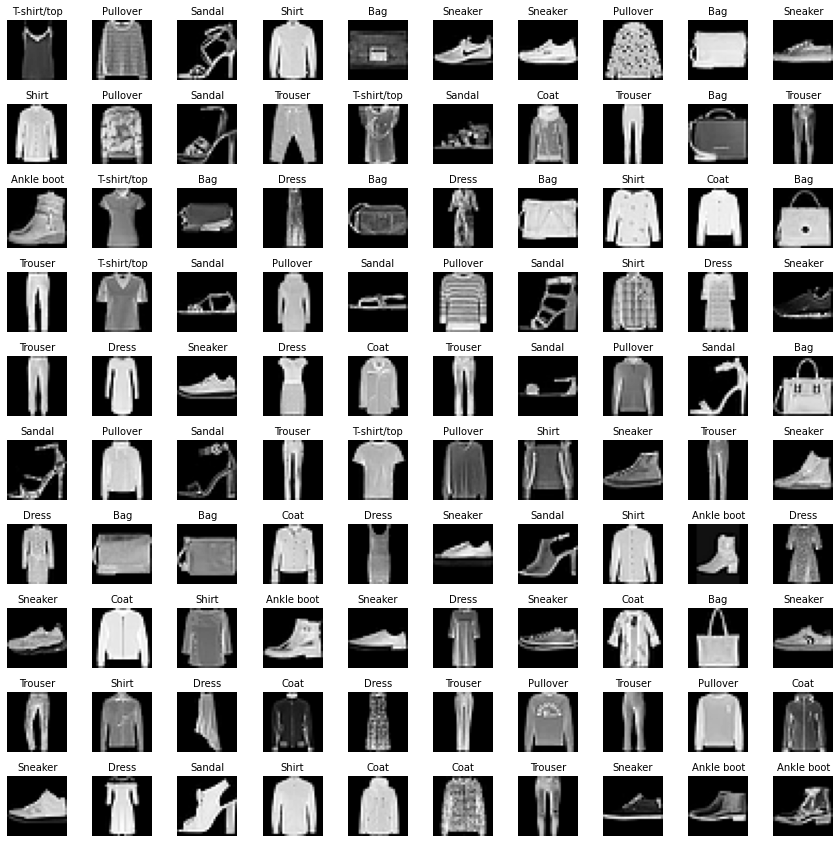

In [11]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

width = 10
height = 10

fig ,axes = plt.subplots(height, width , figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, width * height):

    index = np.random.randint(0,60000)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(classes[y_train[index]], fontsize = 10)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

# PreProcessing The Images

In [12]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [13]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

# Building And Training The Convolutional AutoEncoder

In [31]:
autoencoder = Sequential()

############ Encoder

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "valid" , input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

# Önemli bir etki padding = "same"
autoencoder.add(Conv2D(filters = 8 , kernel_size = (3,3), activation = "relu",padding = "same"))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = "same"))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8 , kernel_size = (3,3), activation = "relu" ,padding = "same",  strides = (2,2)))
autoencoder.add(Flatten())

#autoencoder.summary()

############ Decoder 

autoencoder.add(Reshape(target_shape = (4,4,8)))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same"))

#autoencoder.summary()

autoencoder.add(UpSampling2D(size = (2,2)))

#autoencoder.summary()


autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "valid"))
autoencoder.add(UpSampling2D(size = (2,2)))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation = "sigmoid", padding = "same"))

autoencoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_12 (Flatten)        (None, 128)             

In [ ]:
# Output = (Input - Filter + 1) / Strides
# Input = (28,28,1)
# Filter Size = 3 --> kernel_size 
# OutPut = (28 - 3 + 1 ) / 1 = 26


# UpSampling2D = (16,16,8)
# Filter Size = 3
# Output = (16-3+1)/1 = 14
# (14,14,16)

In [34]:
autoencoder.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = autoencoder.fit(X_train ,X_train, epochs = 50, validation_data = (X_test,X_test))

Epoch 1/50
1875/1875 [==============================] - 37s 14ms/step - loss: 0.3134 - accuracy: 0.5035 - val_loss: 0.2941 - val_accuracy: 0.5040
Epoch 2/50
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2885 - accuracy: 0.5063 - val_loss: 0.2876 - val_accuracy: 0.5045
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2842 - accuracy: 0.5068 - val_loss: 0.2847 - val_accuracy: 0.5049
Epoch 4/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2816 - accuracy: 0.5071 - val_loss: 0.2830 - val_accuracy: 0.5053
Epoch 5/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2798 - accuracy: 0.5073 - val_loss: 0.2811 - val_accuracy: 0.5053
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2786 - accuracy: 0.5075 - val_loss: 0.2799 - val_accuracy: 0.5053
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2776 - accuracy: 0.5077 - val_loss: 0.2793 -

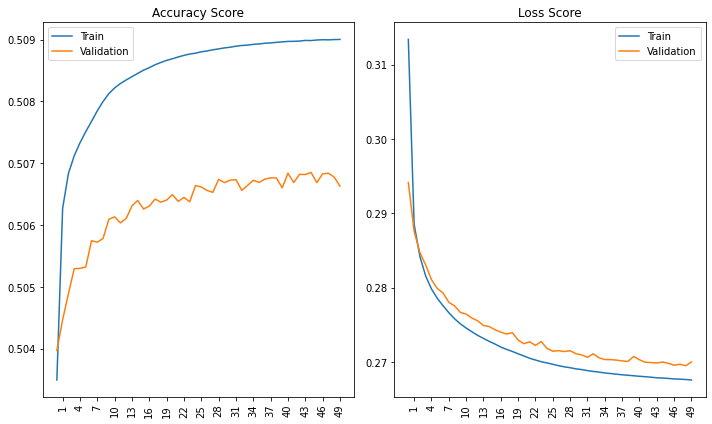

In [36]:
history_graph(history, 50)

# Encoding and Decoding The Test Images

In [37]:
autoencoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_12 (Flatten)        (None, 128)             

In [39]:
encoder = Model( inputs = autoencoder.input, outputs = autoencoder.get_layer("flatten_12").output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_62 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                           

In [42]:
print(X_test.shape)

(10000, 28, 28, 1)


In [43]:
coded_test_images = encoder.predict(X_test)
coded_test_images.shape

(10000, 128)

In [44]:
coded_test_images[0]

array([0.18455078, 0.35841313, 0.60379714, 1.0699757 , 1.0843487 ,
       0.16364272, 1.6445587 , 1.0282362 , 0.09394819, 0.40973744,
       0.8545003 , 0.92370033, 1.4273586 , 0.07752027, 0.8203062 ,
       1.37389   , 0.15244138, 0.61085147, 0.8703809 , 1.0444238 ,
       1.5699039 , 0.11426777, 0.863859  , 1.3808254 , 0.36192513,
       1.0452732 , 1.1218139 , 1.3170227 , 1.9158025 , 0.60091674,
       0.9961437 , 1.5628116 , 0.1283136 , 0.27380964, 0.4344653 ,
       1.3421768 , 1.5598187 , 0.22609192, 1.90904   , 0.94529223,
       0.15296307, 0.3054925 , 0.7726947 , 1.0913486 , 2.2079432 ,
       0.56761134, 0.6512351 , 1.0659118 , 0.7808527 , 0.49064714,
       0.49390966, 1.0757353 , 1.3300884 , 1.7210714 , 0.8707564 ,
       1.0398268 , 0.8849525 , 1.0224923 , 0.9241773 , 1.6729872 ,
       0.92245466, 1.108222  , 1.7029021 , 1.4402188 , 0.8083139 ,
       0.26477095, 0.52892685, 1.0413187 , 1.333442  , 1.2979094 ,
       1.4025173 , 0.6119622 , 1.3183718 , 0.9180041 , 0.65811

In [45]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 28, 28, 1)

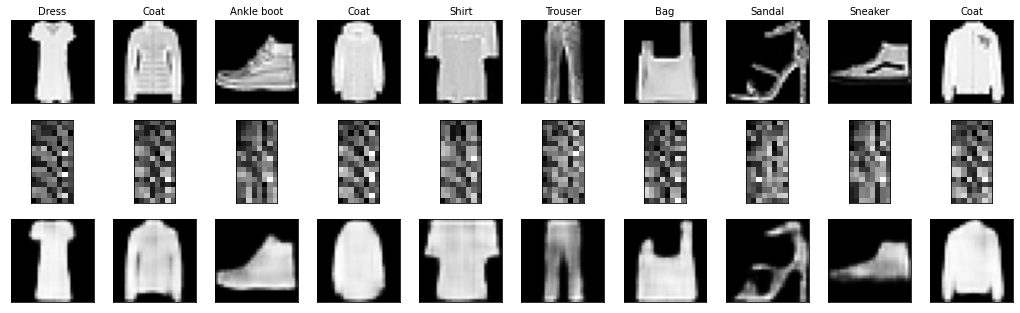

In [50]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0], size = n_images)
plt.figure(figsize = (18,18))
for i, image_index in enumerate(test_images):

    # Original Images

    ax = plt.subplot(10,10,i + 1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap = "gray")
    plt.title(classes[y_test[image_index]], fontsize = 10)
    plt.xticks(())
    plt.yticks(())

    # Coded Images

    ax = plt.subplot(10,10,i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,8), cmap = "gray")
    #plt.title(classes[y_test[image_index]], fontsize = 10)
    plt.xticks(())
    plt.yticks(())

    # Decoded Images

    ax = plt.subplot(10,10,i + 1 + n_images*2)
    plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap = "gray")
    #plt.title(classes[y_test[image_index]], fontsize = 10)
    plt.xticks(())
    plt.yticks(())

---

# HomeWork

In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab.patches import cv2_imshow

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [16]:
y_train[1]

array([9], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

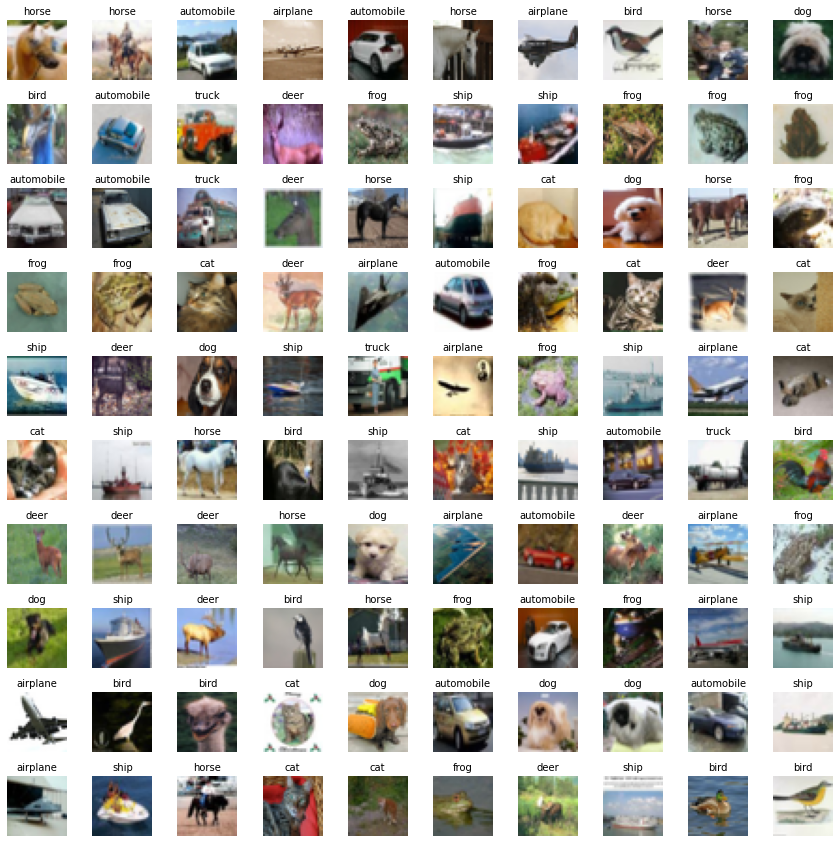

In [17]:
width = 10
height = 10

fig , axes = plt.subplots(height , width, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0 , width * height):

    index = np.random.randint(0,50000)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(classes[y_train[index][0]], fontsize = 10)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [20]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D,Flatten,AveragePooling2D,BatchNormalization,UpSampling2D,Reshape,Input

In [25]:
autoencoder = Sequential()

# Encoder 

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2) , padding = "same"))

autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2), padding = "same"))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2), padding = "same")) # Encoded Images

#autoencoder.summary()

# Decoder

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2),))

# 3 Channels var Gray olarak almadık !!

autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3) , activation = "sigmoid", padding = "same"))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_15 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [26]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = autoencoder.fit(X_train, X_train , epochs = 50 , validation_data = (X_test, X_test))

Epoch 1/50
1563/1563 [==============================] - 45s 22ms/step - loss: 0.5823 - accuracy: 0.6507 - val_loss: 0.5757 - val_accuracy: 0.6798
Epoch 2/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5678 - accuracy: 0.7238 - val_loss: 0.5682 - val_accuracy: 0.7098
Epoch 3/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5648 - accuracy: 0.7409 - val_loss: 0.5633 - val_accuracy: 0.7634
Epoch 4/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5632 - accuracy: 0.7487 - val_loss: 0.5624 - val_accuracy: 0.7620
Epoch 5/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5624 - accuracy: 0.7538 - val_loss: 0.5610 - val_accuracy: 0.7816
Epoch 6/50
1563/1563 [==============================] - 35s 23ms/step - loss: 0.5617 - accuracy: 0.7569 - val_loss: 0.5605 - val_accuracy: 0.7837
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5612 - accuracy: 0.7592 - val_loss: 0.5598 -

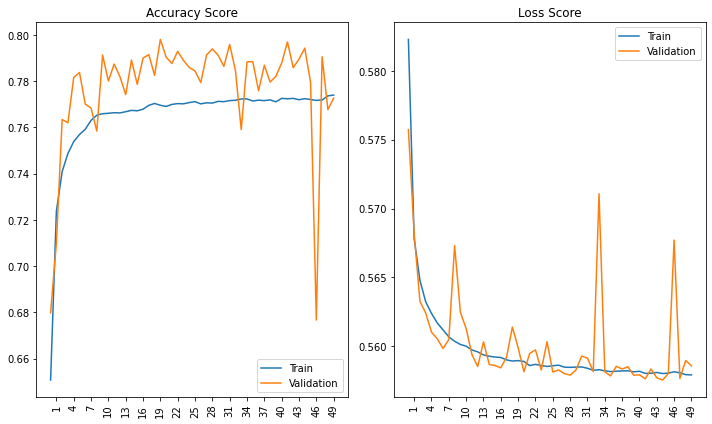

In [28]:
history_graph(history, 50)

In [29]:
encoder = Model(inputs = autoencoder.input , outputs = autoencoder.get_layer("average_pooling2d_14").output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        18464     
                                                             

In [30]:
coded_test_images = encoder.predict(X_test)
coded_test_images.shape

(10000, 4, 4, 16)

In [31]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 32, 32, 3)

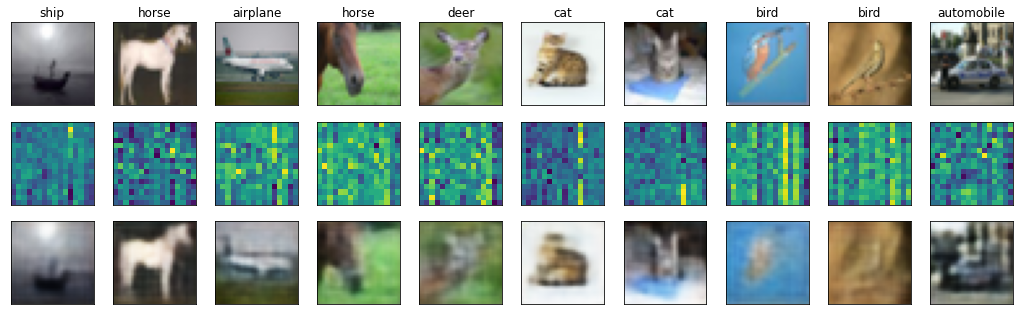

In [34]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0], size = n_images)
plt.figure(figsize = (18,18))

for i , image_index in enumerate(test_images):

    # Original Images

    ax = plt.subplot(10,10, i + 1)
    plt.imshow(X_test[image_index].reshape(32,32,3))
    plt.title(classes[y_test[image_index][0]])
    plt.xticks(())
    plt.yticks(())

    # Encoder Images

    ax = plt.subplot(10,10, i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,16))
    plt.xticks(())
    plt.yticks(())

    # Decoder Images

    ax = plt.subplot(10,10, i + 1 + n_images*2)
    plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())